## MNIST with Torch - Linear
In this exercise, I try to use a Linear NN for MNIST with pytorch and pytorch-vision dataset from MNIST. The Neural Network and the train method are in the archives of this paste.

In [1]:
import torch 
from torchvision import datasets, transforms
from neural_network import MNIST_NN_Linear
from train import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Runing in {device}")

Runing in cpu


### Training
For a Linear model, I did a transform method to PIL-Image to a Tensor, that will be resize later on the code to a matrix (batch size and 784 for the pixels). The batch size, chosed arbitrary, was 50, because this would make more epoch's to the NN.

In [3]:
torch.manual_seed(42)
nsamples = 50

transform = transforms.Compose([
    transforms.ToTensor() 
])

dataset1 = datasets.MNIST('../data', train=True, download=True,transform=transform)
dataset2 = datasets.MNIST('../data', train=False,transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,batch_size=nsamples, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2,batch_size=nsamples, shuffle=True)

In [4]:
model = MNIST_NN_Linear().to(device)

Batch 1:
Imagens (data): torch.Size([50, 1, 28, 28])
Rótulos (target): torch.Size([50])


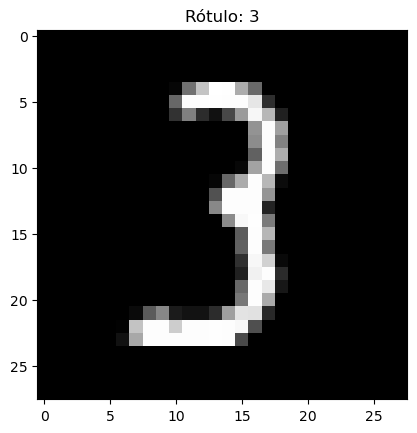

In [5]:
for batch_idx, (data, target) in enumerate(train_loader):
    print(f'Batch {batch_idx + 1}:')
    print('Imagens (data):', data.size())
    print('Rótulos (target):', target.size())


    plt.imshow(data[0].squeeze(), cmap='gray')
    plt.title(f'Rótulo: {target[0].item()}')
    plt.show()
    break

Train Epoch: 0 
 Loss: 2.2932991981506348 
 Acurracy: 0.00013333333481568843
Train Epoch: 50 
 Loss: 0.5424848198890686 
 Acurracy: 0.028616666793823242
Train Epoch: 100 
 Loss: 0.38146016001701355 
 Acurracy: 0.06468333303928375
Train Epoch: 150 
 Loss: 0.29035499691963196 
 Acurracy: 0.10248333215713501
Train Epoch: 200 
 Loss: 0.3295057415962219 
 Acurracy: 0.14091666042804718
Train Epoch: 250 
 Loss: 0.23732101917266846 
 Acurracy: 0.17963333427906036
Train Epoch: 300 
 Loss: 0.24207399785518646 
 Acurracy: 0.21853333711624146
Train Epoch: 350 
 Loss: 0.19244752824306488 
 Acurracy: 0.25725001096725464
Train Epoch: 400 
 Loss: 0.03523604944348335 
 Acurracy: 0.29660001397132874
Train Epoch: 450 
 Loss: 0.1363184154033661 
 Acurracy: 0.3357333242893219
Train Epoch: 500 
 Loss: 0.10285329073667526 
 Acurracy: 0.3745333254337311
Train Epoch: 550 
 Loss: 0.2489081174135208 
 Acurracy: 0.41394999623298645
Train Epoch: 600 
 Loss: 0.21976812183856964 
 Acurracy: 0.4534166753292084
Train 

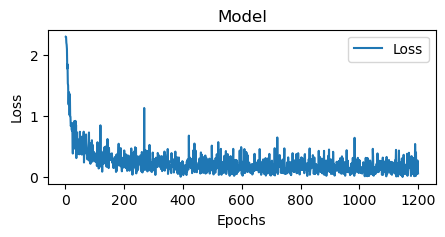

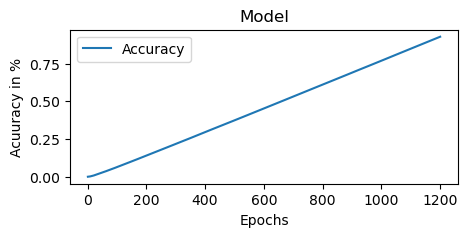

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
loss_items, final_epoch, acc_items = train(model,device,train_loader,optimizer)
loss_graph(loss_items,final_epoch)
accuracy_graph(acc_items,final_epoch)

### Test

In [7]:
test(model,device,test_loader)

Test Loss: 0.0034860737611074 
 Acurracy 0.95
